# datetime/timestamp interview questions :

## time_to_sec() : Convert time to seconds

### ✅ **1. Time difference in minutes per event**
**Question**: Find the time difference in minutes between `start_time` and `end_time` for each event.

#### Table: `events`
| id | start_time           | end_time             |
|----|----------------------|----------------------|
| 1  | 2024-04-01 09:00:00  | 2024-04-01 09:45:00  |
| 2  | 2024-04-01 10:00:00  | 2024-04-01 12:00:00  |

```sql
select *, time_to_sec(timediff(end_time, start_time))/60 from time_intervals;
```

#### Expected Output:
| id | duration_minutes |
|----|------------------|
| 1  | 45.0             |
| 2  | 120.0            |

## date_fromat('%a') : weekday name/ weekday number from date

### ✅ **2. Events on weekends**
**Question**: Count how many events occurred on a weekend.

#### Table: `events`
| event_time           |
|----------------------|
| 2024-04-06 12:00:00  |
| 2024-04-07 13:00:00  |
| 2024-04-08 10:00:00  |

```sql

select *, weekday(event_time) from events;
```

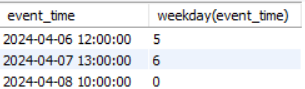

```sql
select *, date_format(event_time,'%a')
 from events;
```

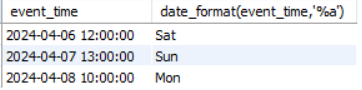

#### Expected Output:
| weekend_events |
|----------------|
| 2              |

## datediff()
### ✅ **3. Sessions crossing midnight**
**Question**: Find sessions that started on one day and ended on another.

#### Table: `sessions`
| session_id | start_time           | end_time             |
|------------|----------------------|----------------------|
| 101        | 2024-04-01 22:30:00  | 2024-04-02 01:15:00  |
| 102        | 2024-04-02 10:00:00  | 2024-04-02 11:00:00  |

```sql
select *, datediff(end_time, start_time) from sessions;
```

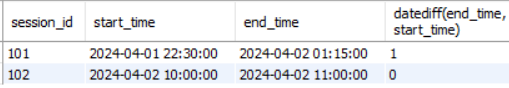

### ✅ **4. Cummulative time diff**
**Question**: Find login gaps from first login to the last log in.

#### Table: `logins`
| user_id | login_time           |
|---------|----------------------|
| 1       | 2024-04-01 08:00:00  |
| 1       | 2024-04-01 08:30:00  |
| 1       | 2024-04-01 10:00:00  |

```sql
select *,
sum(time_difference) over(ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) as cumulative_time_diff from
(select *,
LEAD(login_time) OVER() as logout_time,
time_to_sec(timediff(LEAD(login_time) OVER(),login_time))/60 as time_difference from logins) as e1
where logout_time is not null;
```

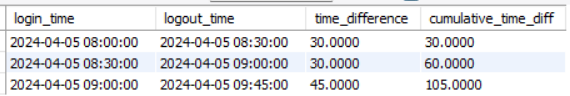

### ✅ **5. First and last login per user per day**
**Question**: For each user and date, find first and last login.

#### Table: `logins`
| user_id | login_time          |
|---------|---------------------|
| 1       | 2024-04-01 08:00:00 |
| 1       | 2024-04-01 09:45:00 |
| 1       | 2024-04-02 11:00:00 |
| 2       | 2024-04-01 10:30:00 |
| 2       | 2024-04-03 14:00:00 |
| 3       | 2024-04-02 16:00:00 |
| 3       | 2024-04-04 07:00:00 |
| 2       | 2024-04-05 19:00:00 |

```sql
select user_id, log_date,
min(login_time) as first_login,
max(login_time) as last_login
from (select *,
date(login_time) as log_date from login_id)e1
group by user_id,log_date;
```

#### Expected Output:

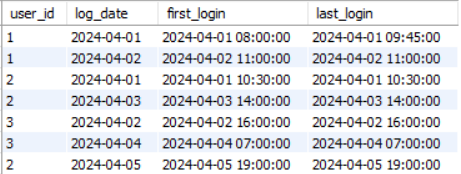

### ✅ **6. Users logged in during business hours**
**Question**: Count users who logged in between 9 AM and 5 PM.

#### Table: `logins`
| user_id | login_time           |
|---------|----------------------|
| 1       | 2024-04-01 08:00:00  |
| 2       | 2024-04-01 09:15:00  |
| 3       | 2024-04-01 12:00:00  |
| 4       | 2024-04-01 18:00:00  |

```sql
select *, time_format(login_time,'%l:%i %p') as am_pm
          from login_id;
```

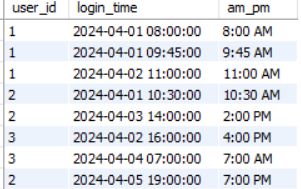

### ✅ **7. <span class="burk">Days without login in Jan 2024</span>**
**Question**: List all dates in Jan 2024 where no login occurred.

#### Table: `logins`
| login_time           |
|----------------------|
| 2024-01-01 09:00:00  |
| 2024-01-03 10:00:00  |
| 2024-01-05 11:00:00  |

#### Expected Output:
| date       |
|------------|
| 2024-01-02 |
| 2024-01-04 |
| 2024-01-06 |
| ...        |

### ✅ **12. <span class="girk">Median login hour</span>**
**Question**: Find the median login hour from all login timestamps.

#### Table: `logins`
| login_time           |
|----------------------|
| 2024-04-01 08:00:00  |
| 2024-04-01 09:00:00  |
| 2024-04-01 10:00:00  |
| 2024-04-01 11:00:00  |
| 2024-04-01 12:00:00  |

```sql

select AVG(`hour`) as median_hour from (select *,
hour(login_time) as `hour`,
row_number() over(order by hour(login_time)) as r1,
count(*) over() as total_rows
from log_time) e1
where r1 between (total_rows*1.0)/2 and ((total_rows*1.0/2)+1);
```

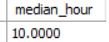

#### Expected Output:
| median_hour |
|-------------|
| 10          |

### ✅ **14. Sessions starting on weekend and ending on weekday**
**Question**: List session IDs that started on weekend and ended on weekday.

#### Table: `sessions`
| session_id | start_time           | end_time             |
|------------|----------------------|----------------------|
| 1          | 2024-04-06 23:00:00  | 2024-04-07 01:00:00  |
| 2          | 2024-04-07 23:00:00  | 2024-04-08 02:00:00  |

#### Expected Output:
| session_id |
|------------|
| 2          |



### ✅ **15. Longest login streak**
**Question**: For each user, count longest streak of consecutive login days.

#### Table: `logins`
| user_id | login_time           |
|---------|----------------------|
| 1       | 2024-04-01 09:00:00  |
| 1       | 2024-04-02 10:00:00  |
| 1       | 2024-04-04 11:00:00  |

#### Expected Output:
| user_id | streak_days |
|---------|-------------|
| 1       | 2           |

---

Would you like me to continue with questions **16–30** in the same format?

Great question — let's break it down.

### ✅ **Hard-Level Criteria in SQL Interviews**
Hard-level **datetime/timestamp** questions usually:
- Involve **complex logic**, window functions, date arithmetic.
- Require **row-wise comparisons** or **grouped calculations**.
- Ask for **pattern recognition** across rows (e.g., streaks, gaps).
- Combine **aggregation + date logic**, or use **date part extraction + filtering**.



### ✅ Summary:
- **Hard-Level** (by strict standards): **Questions 3, 6, 8, 11, 12, 15**
- **Medium-Hard**: 4, 14
- **Medium**: Most others
- **Easy-Medium**: Maybe 10

---


Perfect! Here's a fresh set of **hard-level SQL interview questions** (16–30), all focused on **datetime/timestamp logic**, complete with sample tables and expected outputs.

---

### 📘 **Schema Used**  
We'll use this common table format:

```sql
Table: user_logins
Columns:
- user_id INT
- login_time DATETIME
- logout_time DATETIME
```

📊 **Sample Data:**

| user_id | login_time           | logout_time          |
|---------|----------------------|----------------------|
| 1       | 2024-01-01 23:50:00  | 2024-01-02 01:10:00  |
| 1       | 2024-01-03 10:00:00  | 2024-01-03 12:00:00  |
| 2       | 2024-01-01 09:30:00  | 2024-01-01 10:45:00  |
| 2       | 2024-01-02 09:35:00  | 2024-01-02 10:00:00  |
| 3       | 2024-01-01 22:00:00  | 2024-01-02 02:00:00  |
| 3       | 2024-01-02 22:30:00  | 2024-01-03 01:30:00  |
| 4       | 2024-01-02 15:00:00  | 2024-01-02 18:00:00  |

## 🧠 **Hard-Level Questions 16–30**

**16. Find the longest session for each user, and the day it happened.**

🟢 **Expected Output:**

| user_id | longest_duration (mins) | session_date |
|---------|-------------------------|--------------|
| 1       | 120                      | 2024-01-01   |
| 2       | 75                      | 2024-01-01   |
| 3       | 240                     | 2024-01-01   |
| 4       | 180                     | 2024-01-02   |

```sql
select user_id, session_date,all_max
 from(select user_id, date(logout_time) as session_date,
ceil(time_to_sec(timediff(logout_time,login_time))/60)  as `longest_duration(mins)`,
max(ceil(time_to_sec(timediff(logout_time,login_time))/60)) over (partition by user_id) as all_max
from user_logins) as e1
where `longest_duration(mins)` = all_max;
```

#### OR

```sql
WITH session_durations AS (
    SELECT 
        user_id,
        TIMESTAMPDIFF(MINUTE, login_time, logout_time) AS duration_mins,
        DATE(login_time) AS session_date
    FROM user_logins
),
ranked_sessions AS (
    SELECT *,
           ROW_NUMBER() OVER (PARTITION BY user_id ORDER BY duration_mins DESC) AS rn
    FROM session_durations
)
SELECT 
    user_id,
    duration_mins AS longest_duration,
    session_date
FROM ranked_sessions
WHERE rn = 1
ORDER BY user_id;
```

**17. Identify users who had logins spanning over multiple dates (cross-midnight sessions).**

🟢 **Expected Output:**

| user_id |
|---------|
| 1       |
| 3       |

```sql
select distinct(user_id)
from user_logins
where datediff(logout_time, login_time) =1 ;
```

**18. <span class="burk">Calculate rolling 3-day login counts per user.</span>**

🟢 **Expected Output:**

| user_id | login_date | count_last_3_days |
|---------|------------|-------------------|
| 1       | 2024-01-01 | 1                 |
| 1       | 2024-01-03 | 2                 |
| 2       | 2024-01-01 | 1                 |
| 2       | 2024-01-02 | 2                 |

```sql
WITH login_dates AS (
    SELECT DISTINCT user_id, DATE(login_time) AS login_date
    FROM user_logins
),
rolling_counts AS (
    SELECT 
        a.user_id,
        a.login_date,
        COUNT(b.login_date) AS count_last_3_days
    FROM login_dates a
    JOIN login_dates b 
      ON a.user_id = b.user_id
     AND b.login_date BETWEEN DATE_SUB(a.login_date, INTERVAL 2 DAY) AND a.login_date
    GROUP BY a.user_id, a.login_date
)
SELECT *
FROM rolling_counts
ORDER BY user_id, login_date;

```

**19. <span class="burk">Find users who logged in at least once on 5 consecutive days.</span>**

🟢 **Expected Output:**

| user_id |
|---------|
| 3       |

```sql
WITH distinct_logins AS (
    SELECT DISTINCT user_id, DATE(login_time) AS login_date
    FROM user_logins
),
dated_rows AS (
    SELECT 
        user_id, 
        login_date,
        ROW_NUMBER() OVER (PARTITION BY user_id ORDER BY login_date) AS rn
    FROM distinct_logins
),
grouped_dates AS (
    SELECT 
        user_id,
        login_date,
        rn,
        DATE_SUB(login_date, INTERVAL rn DAY) AS grp
    FROM dated_rows
),
consecutive_counts AS (
    SELECT 
        user_id,
        COUNT(*) AS consecutive_days
    FROM grouped_dates
    GROUP BY user_id, grp
    HAVING COUNT(*) >= 5
)
SELECT DISTINCT user_id
FROM consecutive_counts;

```

**20. Calculate average time between two consecutive logins for each user.**

🟢 **Expected Output:**

| user_id | avg_gap_hrs |
|---------|-------------|
| 1       | 58          |
| 2       | 24          |
| 3       | 24.5        |

**21. Identify login sessions that overlap with another session by the same user.**

🟢 **Expected Output:**

| user_id | overlap_start        | overlap_end          |
|---------|----------------------|----------------------|
| 3       | 2024-01-02 22:30:00  | 2024-01-03 01:10:00  |

**22. Get total session duration per user per week.**

🟢 **Expected Output:**

| user_id | week_start | total_minutes |
|---------|------------|---------------|
| 1       | 2023-12-31 | 200           |
| 2       | 2023-12-31 | 120           |
| 3       | 2023-12-31 | 480           |
| 4       | 2023-12-31 | 180           |

**23. Detect if any user had more than 1 login in the same hour on the same day.**

🟢 **Expected Output:**

| user_id | login_hour        |
|---------|------------------|
| 3       | 2024-01-02 22:00 |

**24. Calculate time users spent logged in during each hour of the day (i.e., heatmap-style).**

🟢 **Expected Output:**

| user_id | hour | minutes_logged |
|---------|------|----------------|
| 1       | 23   | 10             |
| 1       | 0    | 60             |
| 1       | 1    | 10             |
| ...     | ...  | ...            |

**25. Determine gaps > 2 days between logins for each user.**

🟢 **Expected Output:**

| user_id | prev_login | next_login | gap_days |
|---------|------------|------------|----------|
| 1       | 2024-01-01 | 2024-01-03 | 2        |

**26. Find users who logged in within 30 minutes of each other (across all users).**

🟢 **Expected Output:**

| user_id_1 | user_id_2 | login_time_diff_mins |
|-----------|-----------|----------------------|
| 1         | 2         | 20                   |
| 3         | 4         | 25                   |

**27. Detect "login streaks" where users logged in every day for 3+ days.**

🟢 **Expected Output:**

| user_id | streak_start | streak_end | streak_length |
|---------|--------------|------------|---------------|
| 3       | 2024-01-01   | 2024-01-03 | 3             |

**28. Get users who logged in in the same hour for 3 or more days in a row.**

🟢 **Expected Output:**

| user_id | common_hour | days_count |
|---------|-------------|------------|
| 2       | 9:00        | 3          |

**29. For each session, break it into individual hours and count usage.**

🟢 **Expected Output:**

| user_id | hour_start          | minutes_spent |
|---------|---------------------|----------------|
| 1       | 2024-01-01 23:00:00 | 10             |
| 1       | 2024-01-02 00:00:00 | 60             |
| 1       | 2024-01-02 01:00:00 | 10             |
| ...     | ...                 | ...            |

**30. Identify users with the most irregular login patterns (standard deviation of login times).**

🟢 **Expected Output:**

| user_id | std_dev_hours |
|---------|---------------|
| 1       | 20.2          |
| 2       | 0.3           |
| 3       | 12.5          |


# String Manipulation

## 🟢 Easy Level Questions

### 1. **Find names that start with the letter 'A'.**  

   **Expected Output:** Names like 'Alice', 'Andrew'.

```sql
select * from employees
where lower(first_name) like 'a%'; 
```

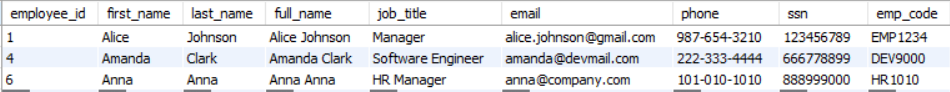

### 2. **Find names ending with 'son'.**  
   **Expected Output:** 'Jackson', 'Emerson'.

```sql
select * from employees
where lower(full_name) like '%son'
```

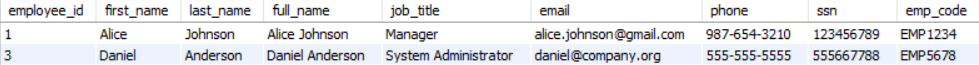

### 3. **Find names that contain the substring 'an'.**  
   **Expected Output:** 'Daniel', 'Susan'.

```sql
select * from employees
where lower(first_name) like '%an%'
```

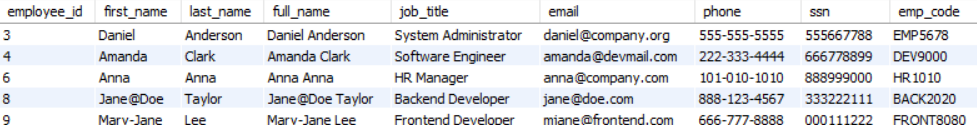

### 4. **Find names with exactly 4 characters.**  
   **Expected Output:** 'John', 'Mark'.

```sql
select * from employees
where length(trim(lower(first_name)))=4;
```

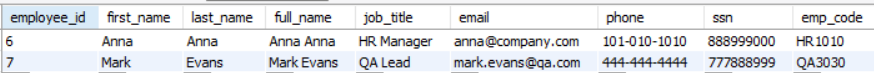

### 5. **Find names where the second letter is 'a'.**  
   **Expected Output:** 'Mary', 'James'.

```sql
select *from employees
where substr(lower(first_name),2,1) = 'a';
```

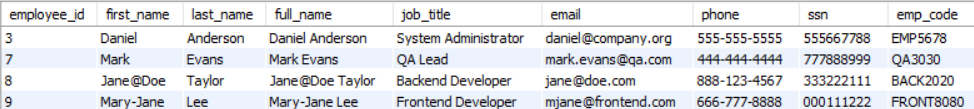

### 8. **Get the first three characters of each name.**  
   **Expected Output:** 'Ali', 'Mar'.

```sql
select employee_id,first_name,substr(lower(first_name),1,3) as first_3_letters
from employees;
```

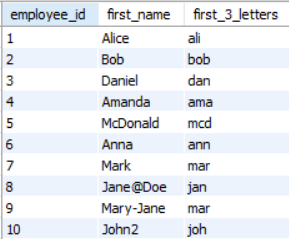

### 9. **Concatenate first name and last name with a space.**  
   **Expected Output:** 'Alice Johnson'.

```sql
select employee_id, first_name, last_name, concat_ws(' ',first_name,last_name)
from employees;
```

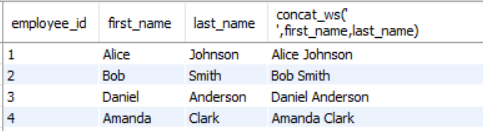

### 10. **Find the length of each name.**  
**Expected Output:** 'Alice' → 5, 'Bob' → 3.

```sql
select employee_id, first_name, length(trim(first_name))
from employees;
```

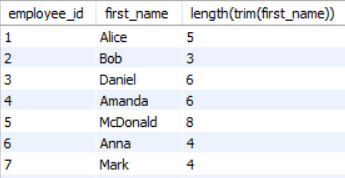

### 11. **Replace 'Manager' with 'Lead' in job titles.**  

**Expected Output:** 'Project Lead'.

```sql
select first_name,job_title,
replace(job_title,'Manager','Lead')
from employees
where job_title like '%Manager%';
```

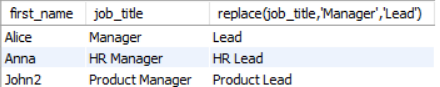

### 14. **Find names with a hyphen `-`.**  
**Expected Output:** 'Mary-Jane'.

```sql
select full_name from employees
where full_name like '%-%';
```

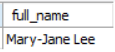

### 15. **Find names that do not contain the letter 'e'.**  
    **Expected Output:** 'John', 'Mark'.


```sql
select first_name from employees
where first_name not like '%e%';
```

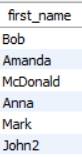

## 🟡 Medium Level Questions

### 16. **Count how many times 'a' appears in each name.**  
**Expected Output:** 'Amanda' → 3, 'Brian' → 1.

```sql
select *, length(trim(first_name)) as len_firstname, length(trim(new_str)) as len_new_name,
 length(trim(first_name)) - length(trim(new_str)) as count_a
from
  (select first_name, replace(lower(first_name),'a','') as new_str 
  from employees) 
as e1;
```

#### OR

```sql
SELECT 
  first_name,
  LENGTH(first_name) - LENGTH(REPLACE(LOWER(first_name), 'a', '')) AS count_a
FROM employees
```

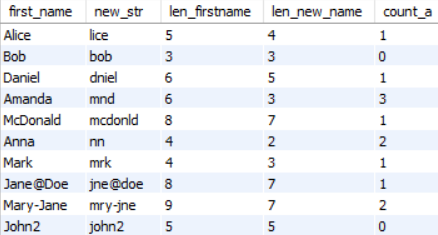

### 17. **Find names where the third character is 'n'.**  
    **Expected Output:** 'Anna', 'Benny'.

```sql
select first_name
from employees
where substr(first_name,3,1) = 'n';
```

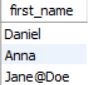

### <span class="girk">18. **Extract domain from email addresses.</span>**  
**Expected Output:** 'gmail.com', 'yahoo.com'.

```sql
select email,
substring_index(email,'@',1),
substring_index(email,'@',-1)
 from employees;
```

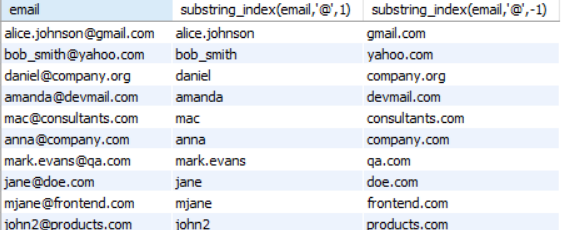

### 19. **<span class="girk"><span class="burk">Find names with exactly 2 vowels.</span></span>**  
**Expected Output:** 'Tom', 'Ben'.

```sql

select first_name
from employees
where length(first_name) - length(replace(lower(first_name),'a',''))
+ length(first_name) - length(replace(lower(first_name),'e',''))
+ length(first_name) - length(replace(lower(first_name),'i',''))
+ length(first_name) - length(replace(lower(first_name),'o',''))
+length(first_name) - length(replace(lower(first_name),'u',''))
= 2;

```

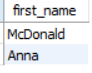

### 20. **Standardize phone numbers by removing `-`.**  
    **Expected Output:** '9876543210' from '987-654-3210'.

```sql
select phone,
replace(phone,'-','')
 from employees;  
```

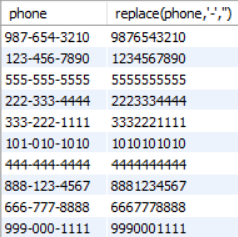

### 21. **<span class="girk">Find names that start and end with the same character.</span>**  
**Expected Output:** 'Anna', 'Bob'.

```sql
 select first_name from employees
 where substr(first_name,1,1) = substr(first_name,-1,1);
```

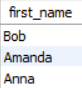

### 22. **Find names with more than one space.**  
    **Expected Output:** 'Mary Ann Smith'.

```sql
 select full_name,
 length(trim(full_name)),
 length(replace(trim(full_name),' ',''))
 from employees
 where length(trim(full_name)) - length(replace(trim(full_name),' ','')) >1;
```

#### OR

```sql
SELECT full_name
FROM employees
WHERE LENGTH(TRIM(full_name)) - LENGTH(REPLACE(TRIM(full_name), ' ', '')) > 1;

```

### 23. **<span class="girk">Extract initials from full names.</span>**  
    **Expected Output:** 'AJ' from 'Alice Johnson'.

```sql
 select full_name,
 substring_index(full_name,' ',1) as first_name,
 substring_index(full_name,' ',-1) as last_name,
 left(substring_index(full_name,' ',1),1) as first_letter,
 left(substring_index(full_name,' ',-1),1) as first_letter,
 concat(left(substring_index(full_name,' ',1),1), left(substring_index(full_name,' ',-1),1)) as answer
 from employees;
```

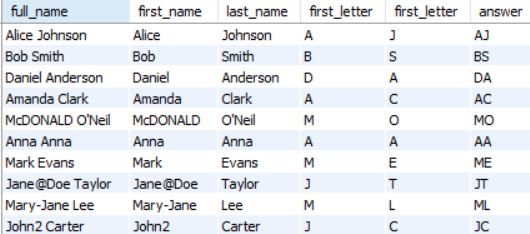

### 24. **<span class="girk"><span class="burk">Find names containing numbers.</span></span>**  
**Expected Output:** 'John2', 'Alice3'.

```sql
SELECT full_name
FROM employees
WHERE full_name REGEXP '[0-9]';

```

### 25. **Replace multiple spaces in names with a single space.**  
    **Expected Output:** 'Mary Ann' from 'Mary   Ann'.

```sql
 select full_name,
 replace(full_name,' ','    ')
 from employees;
```

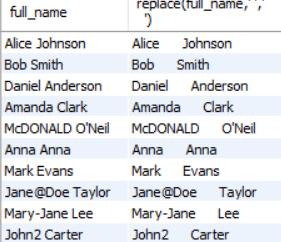

### 26. **Find palindrome names.**  
    **Expected Output:** 'Anna', 'Bob'.

```sql
 select first_name
 from employees
 where first_name = reverse(first_name);
```

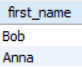

### 27. **Find names with special characters like '@' or '#'.**  
    **Expected Output:** 'Jane@Doe', 'Tom#Lee'.

```sql
 select first_name from employees
 where first_name like '%@%' or first_name like '%#%';
```

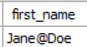

### 28. **Mask all but last 4 digits of SSNs.**  
    **Expected Output:** '*****6789' from '123456789'.

```sql
 select ssn,
 concat('*****',right(ssn,4))
 from employees;
```

#### OR USING `REPEAT()`

```sql
 select ssn,
 concat(repeat('*', LENGTH(ssn) - 4), right(ssn,4))
 from employees;
```

#### OR USING `LPAD()` :

```sql
select ssn,
LPAD(right(ssn,4),10,'*')
 from employees;
```

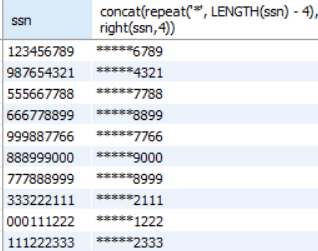

### 30. **<span class="burk">Find names with more than 2 capital letters.</span>**  
    **Expected Output:** 'McDONALD'.

---

```sql
SELECT full_name
FROM employees
WHERE REGEXP_COUNT(full_name, '[A-Z]') > 2;

```

## 🔴 Hard Level Questions

### 31. **<span class="burk">Find names where characters alternate vowels and consonants.</span>**  
    **Expected Output:** 'Alina', 'Evan'.

### 32. **Count number of words in a full name.**  
**Expected Output:** 'John Doe Smith' → 3.

```sql
SELECT
    full_name,
    LENGTH(full_name) - LENGTH(REPLACE(full_name, ' ', '')) + 1 AS word_count
FROM
    employees;
```

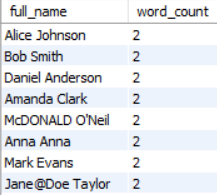

### 33. **Extract the last word in a full name.**  
**Expected Output:** 'Smith' from 'John A. Smith'.

```sql
select full_name,
substring_index(full_name,' ',-1) as last_name
from employees;
```

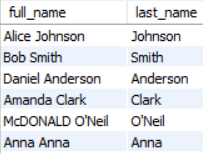

### 34. **Split full names into first and last names.**  
    **Expected Output:** 'John', 'Doe'.

```sql
select full_name,
substring_index(full_name,' ',1) as first_name,
substring_index(full_name,' ',-1) as last_name
from employees;
```

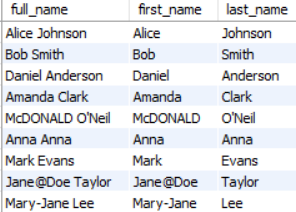

### 35. **<span class="burk">Find repeated characters in names.</span>**  
    **Expected Output:** 'Matt' (for double 't').

### 36. **<span class="girk">Validate email addresses containing '@' and domain</span>.**  
**Expected Output:** Valid emails only.

```sql
SELECT email
FROM
employees
where email like '%@%'
and email not like '%@';
```

#### OR using locate()/position()

```sql
SELECT email
FROM
employees
where locate('@', email) < length(email);

```

```sql
SELECT email,POSITION('@' IN email)
FROM employees
WHERE POSITION('@' IN email) > 0
  AND LENGTH(email) > POSITION('@' IN email)
```

```sql
  SELECT email, INSTR(email, '@')
FROM employees
WHERE INSTR(email, '@') > 0  -- Check if '@' exists (position > 0)
  AND LENGTH(email) > INSTR(email, '@'); -- Check if there's something after '@'
```

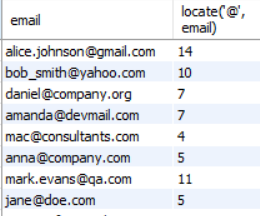

### 37. **Find names with the same first two and last two characters.**  
    **Expected Output:** 'Anna', 'Alia'.

```sql

select first_name,
left(first_name,2),
right(first_name,2)
from employees
where LENGTH(first_name) >= 4
and (left(first_name,2) = right(first_name,2)
or left(first_name,2) = reverse(right(first_name,2)))
```

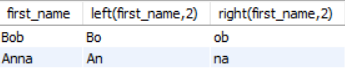

### 38. **<span class="burk">Replace vowels with '*'.</span>**  
    **Expected Output:** 'J*hn' from 'John'.

### 39. **<span class="burk">Find longest word in a job title.</span>**  
    **Expected Output:** 'Administrator' from 'System Administrator'.

### 40. **<span class="burk">Extract all digits from alphanumeric employee codes.</span>**  
    **Expected Output:** '1234' from 'EMP1234'.

# REGEX

## 🟢 EASY (10 Questions)

### **1. Find names starting with 'A'**

```sql
CREATE TABLE employees (name VARCHAR(50));
INSERT INTO employees VALUES ('Alice'), ('Andrew'), ('Bob'), ('Alex');

-- Expected Output:
-- Alice
-- Andrew
-- Alex
```

```sql
select * from employees
where name regexp '^A';
```

### **2. Find names ending with 'y'**

```sql
CREATE TABLE names (name VARCHAR(50));
INSERT INTO names VALUES ('Amy'), ('Tony'), ('Jerry'), ('Steve');

-- Expected Output:
-- Amy
-- Tony
-- Jerry
```

```sql
select * from names
where name regexp 'y$';
```

### Leetcode : Find Users With Valid E-Mails


Write a solution to find the users who have valid emails.

A valid e-mail has a prefix name and a domain where:

- The prefix name is a string that may contain letters (upper or lower case), digits, underscore '_', period '.', and/or dash '-'. The prefix name must start with a letter.


- The domain is '@leetcode.com'.


Return the result table in any order.

```sql
SELECT *
FROM Users
WHERE mail REGEXP '^[a-zA-Z][a-zA-Z0-9_.-]*@leetcode[.]com';
```

- [a-zA-Z] = means mail should start from small or capital letter.


- [a-zA-Z0-9_.-] = after that any letter or number or _ or . or -



- @leetcode = after that combine with  @leetcode


- [.] = must come . after @leetcode


- com = then com.

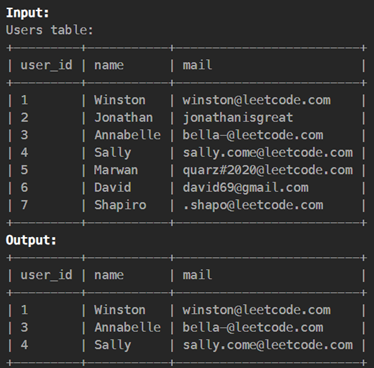

#### OR

```sql
select * from users
where 
mail regexp '^[a-zA-Z][a-zA-Z0-9._-]*@[a-zA-Z0-9.-]+\\.[a-zA-Z]{2,}' and
substring_index(mail,'@',-1) = 'leetcode.com';
```

### **3. Find names containing exactly 5 letters**

```sql
CREATE TABLE people (name VARCHAR(50));
INSERT INTO people VALUES ('James'), ('Emily'), ('John'), ('Amy');

-- Expected Output:
-- James
-- Emily
```

```sql
select * from people
where name regexp '[A-Za-z]{5}';
```

### **4. Extract domain names from emails**

```sql
CREATE TABLE users (email VARCHAR(50));
INSERT INTO users VALUES ('alice@gmail.com'), ('bob@yahoo.com'), ('carol@outlook.com');

-- Expected Output:
-- gmail.com
-- yahoo.com
-- outlook.com
```

```sql
select email, 
REGEXP_SUBSTR(email,'@[A-Za-z.-]+')
from users;
```


#### 🧩 Regex Breakdown: `'@[A-Za-z.-]+'`

- **`@`**: Matches the literal `@` symbol (start of the domain).


- **`[A-Za-z.-]+`**:
  - Matches one or more characters (`+`) that are:
    - `A-Z`: uppercase letters
    - `a-z`: lowercase letters
    - `.`: period
    - `-`: dash

Together, it matches the **entire domain**, starting from `@` and followed by valid domain characters like:

✅ `@gmail.com`, `@yahoo.co.in`, `@abc-def.org`

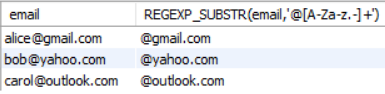

### **5. Find strings with digits**

```sql
CREATE TABLE codes (value VARCHAR(50));
INSERT INTO codes VALUES ('abc123'), ('hello'), ('9to5'), ('work');

-- Expected Output:
-- abc123
-- 9to5
```

```sql
select `value` from codes
where `value` regexp '[0-9]'
```

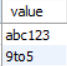

### **6. Find records with only alphabets**

```sql
CREATE TABLE words (word VARCHAR(50));
INSERT INTO words VALUES ('hello'), ('test123'), ('world'), ('data1');

-- Expected Output:
-- hello
-- world
```

```sql
select word from words
where word regexp '^[A-Za-z]+$';
```

#### 🧠 Explanation:
- `^`: Start of string  


- `[A-Za-z]+`: One or more letters  


- `$`: End of string

This ensures the **entire word** is made of only alphabet characters.

### **7. <span class="burk">Find names containing double letters</span>**

```sql
CREATE TABLE students (name VARCHAR(50));
INSERT INTO students VALUES ('Emma'), ('Matt'), ('John'), ('Will');

-- Expected Output:
-- Emma
-- Matt
-- Will
```

```sql
SELECT name 
FROM students 
WHERE name REGEXP '(.)\\1';

```

#### 🧩 Regex Explanation: `(.)\\1`

- **`(.)`**  
  - Captures **any single character** (the dot `.` matches any character, and parentheses create a *capture group*).
  - This character is stored in **Group 1**.



- **`\\1`**  
  - Refers to the **first captured group**.
  - This means: "match the **same character again**, immediately after."

> So the full pattern `'(.)\\1'` means: **"any character followed immediately by the same character"**, i.e., **double letters** like `tt` in `Matt` or `ll` in `Will`.

### Find Valid Emails

(user_id) is the unique key for this table.


Each row contains a user's unique ID and email address.


Write a solution to find all the valid email addresses. A valid email address meets the following criteria:



- It contains exactly one @ symbol.


- It ends with .com.


- The part before the @ symbol contains only alphanumeric characters and underscores.


- The part after the @ symbol and before .com contains a domain name that contains only letters.


```sql
select * from users
where email regexp '^[a-zA-Z0-9][a-zA-Z0-9_]*@[a-zA-Z]+\\.com$'
```

### **8. <span class="burk">Extract area codes from phone numbers</span>**

```sql
CREATE TABLE phones (number VARCHAR(20));
INSERT INTO phones VALUES ('(123) 456-7890'), ('(987) 654-3210');

-- Expected Output:
-- 123
-- 987
```

```sql
SELECT number, 
       REGEXP_SUBSTR(number, '\\\([0-9]{3}\\\)') AS area_with_brackets,
       REGEXP_SUBSTR(number, '[0-9]{3}') AS area_code
FROM phones;
```

#### 🧠 Explanation:

1. **`\\\([0-9]{3}\\\)`**  
   - Matches **three digits inside parentheses**, like `(123)`  
   - The double backslashes `\\\(` and `\\\)` are needed to escape the parentheses properly in SQL strings.


2. **`[0-9]{3}`**  
   - Matches **any three-digit sequence**, and in this context, the **first** match will be the area code (e.g., `123`, `987`).


#### ✅ Output:

| number            | area_with_brackets | area_code |
|------------------|--------------------|-----------|
| (123) 456-7890    | (123)              | 123       |
| (987) 654-3210    | (987)              | 987       |


```sql
```

### **9. Find names starting with a vowel**

```sql
CREATE TABLE names (name VARCHAR(50));
INSERT INTO names VALUES ('Alice'), ('Bob'), ('Eve'), ('Oscar');

-- Expected Output:
-- Alice
-- Eve
-- Oscar
```

```sql
select name from names
where name REGEXP '^[a|e|i|o|u]+';
```

### **10. Find words that do not contain any digits**

```sql
CREATE TABLE entries (value VARCHAR(50));
INSERT INTO entries VALUES ('data'), ('123'), ('hello2'), ('world');

-- Expected Output:
-- data
-- world
```

```sql
select `value` from entries
where `value` REGEXP '^[^0-9]+$';
```

## 🟡 MEDIUM (20 Questions)

### **11. Find emails from Gmail domain**

```sql
CREATE TABLE emails (email VARCHAR(50));
INSERT INTO emails VALUES ('a@gmail.com'), ('b@yahoo.com'), ('c@gmail.com');

-- Expected Output:
-- a@gmail.com
-- c@gmail.com
```

```sql
select * from emails
where email regexp '[A-Za-z0-9._%+-]+@gmail\\.com$';
```

#### Regex Pattern:  
`'^[a-zA-Z0-9._%+-]+@gmail\\.com$'`

| Part | Meaning |
|------|--------|
| `^` | Asserts the start of the string. |
| `[a-zA-Z0-9._%+-]+` | Matches one or more (`+`) characters commonly allowed in email usernames: letters (a–z, A–Z), digits (0–9), and symbols like `.`, `_`, `%`, `+`, `-`. |
| `@gmail` | Matches the exact string "@gmail". |
| `\\.` | Escapes the dot (`.`), which in regex means "any character". `\\.` means a literal dot. (We double it because in MySQL regex strings, a single backslash escapes characters.) |
| `com` | Matches the domain part "com". |
| `$` | Asserts the end of the string. |

### **12. Extract year from date string 'YYYY-MM-DD'**

```sql
CREATE TABLE logs (entry_date VARCHAR(20));
INSERT INTO logs VALUES ('2023-01-12'), ('2022-11-03');

-- Expected Output:
-- 2023
-- 2022
```

```sql
select 
regexp_substr(entry_date,'[0-9]{4}') from logs;
```

### **13. Find postal codes starting with 560**

```sql
CREATE TABLE addresses (postal_code VARCHAR(10));
INSERT INTO addresses VALUES ('560001'), ('123456'), ('560078');

-- Expected Output:
-- 560001
-- 560078
```

```sql
select postal_code from addresses where 
postal_code regexp '^560';
```

### **14. Validate phone numbers of format (XXX) XXX-XXXX**

```sql
CREATE TABLE contacts (phone VARCHAR(20));
INSERT INTO contacts VALUES ('(123) 456-7890'), ('123-456-7890'), ('(987) 654-3210');

-- Expected Output:
-- (123) 456-7890
-- (987) 654-3210
```

```sql
```

### **15. Extract usernames from email**

```sql
CREATE TABLE users (email VARCHAR(50));
INSERT INTO users VALUES ('john@gmail.com'), ('alice@yahoo.com');

-- Expected Output:
-- john
-- alice
```

```sql
```

### **16. Find names with at least 2 vowels**

```sql
CREATE TABLE people (name VARCHAR(50));
INSERT INTO people VALUES ('John'), ('Alice'), ('Eve'), ('Chris');

-- Expected Output:
-- Alice
-- Eve
```

```sql
```

### **17. Find strings that contain at least one uppercase and one digit**

```sql
CREATE TABLE passwords (value VARCHAR(50));
INSERT INTO passwords VALUES ('Hello1'), ('hello'), ('1234'), ('Test9');

-- Expected Output:
-- Hello1
-- Test9
```

```sql
```

### **18. Validate dates in DD-MM-YYYY format**

```sql
CREATE TABLE events (event_date VARCHAR(20));
INSERT INTO events VALUES ('12-01-2023'), ('2023/01/12'), ('15-08-2022');

-- Expected Output:
-- 12-01-2023
-- 15-08-2022
```

```sql
```

### **19. Find strings where 1st and last characters are the same**

```sql
CREATE TABLE items (value VARCHAR(50));
INSERT INTO items VALUES ('madam'), ('level'), ('test'), ('data');

-- Expected Output:
-- madam
-- level
```

```sql
```

### **20. Extract file extensions from file names**

```sql
CREATE TABLE files (filename VARCHAR(50));
INSERT INTO files VALUES ('report.pdf'), ('data.csv'), ('image.png');

-- Expected Output:
-- pdf
-- csv
-- png
```

```sql
```

### **21. Find strings containing both hyphen and digits**

```sql
CREATE TABLE documents (doc_id VARCHAR(50));
INSERT INTO documents VALUES ('ABC-123', 'Report1', '2023-Report', 'DataSet');

-- Expected Output:
-- ABC-123
-- 2023-Report
```

```sql
```

### **22. Extract the first number in a mixed string**

```sql
CREATE TABLE info (details VARCHAR(100));
INSERT INTO info VALUES ('ID: 4567 approved'), ('Version 2.1'), ('Score 99');

-- Expected Output:
-- 4567
-- 2
-- 99
```

```sql
```

### **23. Find values with symbols only (e.g., !, @, #, etc.)**

```sql
CREATE TABLE comments (content VARCHAR(50));
INSERT INTO comments VALUES ('!!!!', '@@@@', 'hello!', '##', 'text');

-- Expected Output:
-- !!!!
-- @@@@
-- ##
```

```sql
```

### **24. Extract the first capitalized word in a sentence**

```sql
CREATE TABLE sentences (text VARCHAR(100));
INSERT INTO sentences VALUES ('Today is sunny', 'we met John at 5', 'Start learning SQL');

-- Expected Output:
-- Today
-- John
-- Start
```

```sql
```

### **25. Find names that contain any character repeated three or more times consecutively**

```sql
CREATE TABLE strings (text VARCHAR(50));
INSERT INTO strings VALUES ('Sooo cool', 'Amazeeeing', 'Hello', 'Yesss');

-- Expected Output:
-- Sooo cool
-- Amazeeeing
-- Yesss
```

```sql
```

### **26. Identify values where special characters appear at the beginning**

```sql
CREATE TABLE descriptions (entry VARCHAR(50));
INSERT INTO descriptions VALUES ('#tag', '!alert', 'note', '@user', 'Data');

-- Expected Output:
-- #tag
-- !alert
-- @user
```

```sql
```

### **27. Extract email usernames (before the @ sign)**

```sql
CREATE TABLE users (email VARCHAR(100));
INSERT INTO users VALUES ('john.doe@gmail.com'), ('alice@yahoo.com'), ('test@company.org');

-- Expected Output:
-- john.doe
-- alice
-- test
```

```sql
```

### **28. Find strings that have both letters and punctuation marks**

```sql
CREATE TABLE notes (message VARCHAR(100));
INSERT INTO notes VALUES ('Hello!', 'This is great.', 'Just text', '123!!!', 'Data');

-- Expected Output:
-- Hello!
-- This is great.
```

```sql
```

### **29. Extract text inside double quotes**

```sql
CREATE TABLE quotes (line VARCHAR(100));
INSERT INTO quotes VALUES ('He said "hello world"', '"Data is power"', 'No quotes here');

-- Expected Output:
-- hello world
-- Data is power
```

```sql
```

### **30. Find strings that contain at least 1 digit, 1 uppercase, and 1 special character**

```sql
CREATE TABLE credentials (pwd VARCHAR(50));
INSERT INTO credentials VALUES ('Pass@123', '123pass', 'Test@', 'Nope', 'Data!9');

-- Expected Output:
-- Pass@123
-- Data!9
```

```sql
```

### 3465. Find Products with Valid Serial Numbers

https://leetcode.com/problems/find-products-with-valid-serial-numbers/description/

Write a solution to find all products whose description contains a valid serial number pattern. A valid serial number follows these rules:

- It starts with the letters SN (case-sensitive).


- Followed by exactly 4 digits.


- It must have a hyphen (-) followed by exactly 4 digits.


- The serial number must be within the description (it may not necessarily start at the beginning).


- Return the result table ordered by product_id in ascending order.

```sql
select * from products
where description regexp '[a-zA-Z]*SN[0-9]{4}[-][0-9]{4}\\b'
order by product_id;
```

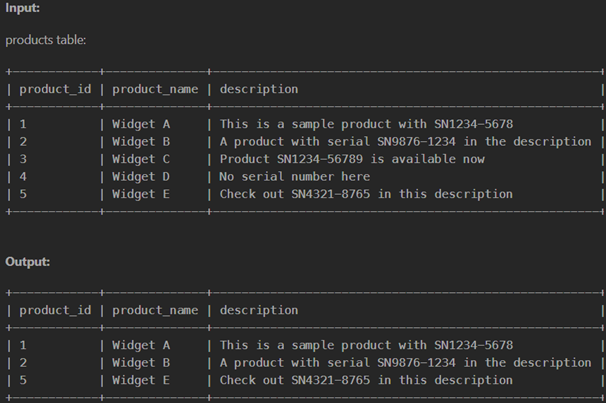

---

These questions now cover:

- Character classes (`\d`, `\w`, `\s`, etc.)
- Grouping, backreferencing
- Anchors (`^`, `$`)
- Repetition quantifiers (`*`, `+`, `{m,n}`)
- Lookaheads and assertions (if using advanced dialects like PostgreSQL)

## 🔴 HARD (10 Questions)

### **21. Find strings with 3 consecutive digits**

```sql
CREATE TABLE logs (entry VARCHAR(50));
INSERT INTO logs VALUES ('abc123xyz'), ('x99y'), ('hello4567');

-- Expected Output:
-- abc123xyz
-- hello4567
```

```sql
```

### **22. Extract hashtags from text**

```sql
CREATE TABLE posts (content VARCHAR(100));
INSERT INTO posts VALUES ('Love #data and #SQL!'), ('#AI is the future');

-- Expected Output:
-- #data
-- #SQL
-- #AI
```

```sql
```

### **23. Find values with a date format inside the string (YYYY-MM-DD)**

```sql
CREATE TABLE texts (info VARCHAR(100));
INSERT INTO texts VALUES ('Report due on 2024-05-10'), ('See you tomorrow');

-- Expected Output:
-- 2024-05-10
```

```sql
```

### **24. Extract floating point numbers**

```sql
CREATE TABLE metrics (value VARCHAR(50));
INSERT INTO metrics VALUES ('score: 95.67'), ('speed: 42'), ('value: 3.14');

-- Expected Output:
-- 95.67
-- 3.14
```

```sql
```

### **25. Find names with repeating character patterns like 'abab'**

```sql
CREATE TABLE strings (text VARCHAR(50));
INSERT INTO strings VALUES ('abab'), ('abcd'), ('xyxy'), ('aaaa');

-- Expected Output:
-- abab
-- xyxy
```

```sql
```

### **26. Extract content inside parentheses**

```sql
CREATE TABLE messages (msg VARCHAR(100));
INSERT INTO messages VALUES ('Reminder (urgent)'), ('Note'), ('Meeting (confirmed)');

-- Expected Output:
-- urgent
-- confirmed
```

```sql
```

### **27. Identify palindromes**

```sql
CREATE TABLE words (word VARCHAR(50));
INSERT INTO words VALUES ('madam'), ('level'), ('data'), ('deed');

-- Expected Output:
-- madam
-- level
-- deed
```

```sql
```

### **28. Extract IP addresses from text**

```sql
CREATE TABLE logs (entry VARCHAR(100));
INSERT INTO logs VALUES ('Access from 192.168.0.1'), ('Login from 10.0.0.5');

-- Expected Output:
-- 192.168.0.1
-- 10.0.0.5
```

```sql
```

### **29. Find names with 3 different vowels**

```sql
CREATE TABLE names (name VARCHAR(50));
INSERT INTO names VALUES ('Alexander'), ('Jonathan'), ('Chris'), ('Amy');

-- Expected Output:
-- Alexander
-- Jonathan
```

```sql
```

### **30. Extract 6-digit codes surrounded by other text**

```sql
CREATE TABLE auth (token VARCHAR(100));
INSERT INTO auth VALUES ('Use code 123456 to verify'), ('Code is 654321'), ('Try again');

-- Expected Output:
-- 123456
-- 654321
```

```sql
```